<a href="https://colab.research.google.com/github/Karim-Anwar/masterProject/blob/main/EDA_one__room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Room 38 sixth floor data analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy

In [3]:
# Load your data here
daylight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/06_38_daglicht.csv', names = ['seq', 'time', 'value'])
roomlight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/06_38_ruimte_verlichting.csv', names = ['seq', 'time', 'value'])
PIR = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/06_38_PIR.csv', names = ['seq', 'time', 'value'])
east = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/weather_station_brightness_E.csv', names = ['seq', 'time', 'value'])
north = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/weather_station_brightness_N.csv', names = ['seq', 'time', 'value'])
south = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/weather_station_brightness_S.csv', names = ['seq', 'time', 'value'])
west = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/06_38/weather_station_brightness_W.csv', names = ['seq', 'time', 'value'])

In [4]:
daylight_csv.tail(10)

,seq,time,value
186926,1000374232,2023-04-04 16:28:00,100.0
186927,1000374233,2023-04-04 16:29:00,100.0
186928,1000374234,2023-04-04 16:30:00,100.0
186929,1000374235,2023-04-04 16:31:00,100.0
186930,1000374236,2023-04-04 16:32:00,100.0
186931,1000374237,2023-04-04 16:33:00,100.0
186932,1000374238,2023-04-04 16:34:00,100.0
186933,1000374239,2023-04-04 16:35:00,100.0
186934,1000374240,2023-04-04 16:36:00,100.0
186935,1000374241,2023-04-04 16:37:00,100.0


In [5]:
roomlight_csv.tail(10)

,seq,time,value
186926,1000374232,2023-04-04 16:28:00,80
186927,1000374233,2023-04-04 16:29:00,80
186928,1000374234,2023-04-04 16:30:00,80
186929,1000374235,2023-04-04 16:31:00,80
186930,1000374236,2023-04-04 16:32:00,80
186931,1000374237,2023-04-04 16:33:00,80
186932,1000374238,2023-04-04 16:34:00,80
186933,1000374239,2023-04-04 16:35:00,80
186934,1000374240,2023-04-04 16:36:00,80
186935,1000374241,2023-04-04 16:37:00,80


In [6]:
PIR.tail(10)

,seq,time,value
989,1000002193,2023-03-30 17:13:02,1.1
990,1000002194,2023-03-30 18:49:20,0.0
991,1000002195,2023-03-30 18:54:33,1.1
992,1000002197,2023-03-30 20:21:17,0.0
993,1000002199,2023-03-31 10:34:41,1.1
994,1000002200,2023-03-31 11:15:02,0.0
995,1000002201,2023-03-31 12:43:40,1.1
996,1000002202,2023-03-31 17:35:35,0.0
997,1000002205,2023-04-03 09:12:22,1.1
998,1000002206,2023-04-03 09:34:09,0.0


In [7]:
south.tail(10)

,seq,time,value
1960,1000001969,2023-04-04 16:00:00,82157
1961,1000001970,2023-04-04 16:10:00,65857
1962,1000001971,2023-04-04 16:20:00,38874
1963,1000001972,2023-04-04 16:30:00,38742
1964,1000001973,2023-04-04 16:40:00,33228
1965,1000001974,2023-04-04 16:50:00,31097
1966,1000001975,2023-04-04 17:00:00,43019
1967,1000001976,2023-04-04 17:10:00,27856
1968,1000001977,2023-04-04 17:20:00,21786
1969,1000001978,2023-04-04 17:30:00,21376


In [8]:
print(min(south['value']))
print(max(south['value']))

0
141870


In [9]:
east.tail(10)

,seq,time,value
1960,1000001969,2023-04-04 16:00:00,14524
1961,1000001970,2023-04-04 16:10:00,11905
1962,1000001971,2023-04-04 16:20:00,9613
1963,1000001972,2023-04-04 16:30:00,10658
1964,1000001973,2023-04-04 16:40:00,9243
1965,1000001974,2023-04-04 16:50:00,8785
1966,1000001975,2023-04-04 17:00:00,9931
1967,1000001976,2023-04-04 17:10:00,9605
1968,1000001977,2023-04-04 17:20:00,9676
1969,1000001978,2023-04-04 17:30:00,8902


In [10]:
print(min(east['value']))
print(max(east['value']))

0
99909


In [11]:
north.tail(10)

,seq,time,value
1960,1000001969,2023-04-04 16:00:00,13169
1961,1000001970,2023-04-04 16:10:00,10646
1962,1000001971,2023-04-04 16:20:00,11644
1963,1000001972,2023-04-04 16:30:00,12471
1964,1000001973,2023-04-04 16:40:00,11043
1965,1000001974,2023-04-04 16:50:00,10513
1966,1000001975,2023-04-04 17:00:00,12537
1967,1000001976,2023-04-04 17:10:00,12486
1968,1000001977,2023-04-04 17:20:00,11561
1969,1000001978,2023-04-04 17:30:00,10733


In [12]:
print(min(north['value']))
print(max(north['value']))

0
26957


In [13]:
west.tail(10)

,seq,time,value
1960,1000001969,2023-04-04 16:00:00,25731
1961,1000001970,2023-04-04 16:10:00,35641
1962,1000001971,2023-04-04 16:20:00,37821
1963,1000001972,2023-04-04 16:30:00,38201
1964,1000001973,2023-04-04 16:40:00,34244
1965,1000001974,2023-04-04 16:50:00,33203
1966,1000001975,2023-04-04 17:00:00,48986
1967,1000001976,2023-04-04 17:10:00,39985
1968,1000001977,2023-04-04 17:20:00,30775
1969,1000001978,2023-04-04 17:30:00,26749


In [14]:
print(min(west['value']))
print(max(west['value']))

0
72519


In [15]:
daylight_csv['time'] = pd.to_datetime(daylight_csv['time'])
roomlight_csv['time'] = pd.to_datetime(roomlight_csv['time'])
PIR['time'] = pd.to_datetime(PIR['time'])
north['time'] = pd.to_datetime(north['time'])
south['time'] = pd.to_datetime(south['time'])
east['time'] = pd.to_datetime(east['time'])
west['time'] = pd.to_datetime(west['time'])

In [16]:
# Data description
print(daylight_csv.describe())
print('\n')
print(roomlight_csv.describe())
print('\n')
print(PIR.describe())
print('\n')
print(east.describe())
print('\n')
print(north.describe())
print('\n')
print(south.describe())
print('\n')
print(west.describe())

                seq          value
count  1.869360e+05  186936.000000
mean   1.000281e+09       9.141879
std    5.436427e+04      27.723016
min    1.000154e+09       0.000000
25%    1.000234e+09       0.000000
50%    1.000281e+09       0.000000
75%    1.000327e+09       0.000000
max    1.000374e+09     100.000000


                seq          value
count  1.869360e+05  186936.000000
mean   1.000281e+09      11.212501
std    5.436427e+04      27.800686
min    1.000154e+09       0.000000
25%    1.000234e+09       0.000000
50%    1.000281e+09       0.000000
75%    1.000327e+09       0.000000
max    1.000374e+09     100.000000


                seq       value
count  9.990000e+02  999.000000
mean   1.000001e+09    0.549449
std    3.811610e+02    0.550275
min    1.000001e+09    0.000000
25%    1.000001e+09    0.000000
50%    1.000001e+09    0.000000
75%    1.000002e+09    1.100000
max    1.000002e+09    1.100000


                seq         value
count  1.970000e+03   1970.000000
mean   1

In [17]:
# Data info
print(daylight_csv.info())
print('\n')
print(roomlight_csv.info())
print('\n')
print(PIR.info())
print('\n')
print(east.info())
print('\n')
print(north.info())
print('\n')
print(south.info())
print('\n')
print(west.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186936 entries, 0 to 186935
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   seq     186936 non-null  int64         
 1   time    186936 non-null  datetime64[ns]
 2   value   186936 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.3 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186936 entries, 0 to 186935
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   seq     186936 non-null  int64         
 1   time    186936 non-null  datetime64[ns]
 2   value   186936 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.3 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----        

In [19]:
day = daylight_csv.drop(['seq'], axis=1).set_index('time')
room = roomlight_csv.drop(['seq'], axis=1).set_index('time')
PIr = PIR.drop(['seq'], axis=1).set_index('time')
nortH = north.drop(['seq'], axis=1).set_index('time')
soutH =south.drop(['seq'], axis=1).set_index('time')
easT = east.drop(['seq'], axis=1).set_index('time')
wesT = west.drop(['seq'], axis=1).set_index('time')

In [23]:
nortH.iloc[0]

value    0
Name: 2023-03-22 00:20:00, dtype: int64

In [29]:
soutH.iloc[0]

value    1
Name: 2023-03-22 00:20:00, dtype: int64

In [30]:
easT.iloc[0]

value    0
Name: 2023-03-22 00:20:00, dtype: int64

In [31]:
wesT.iloc[0]

value    0
Name: 2023-03-22 00:20:00, dtype: int64

In [24]:
day.head()

,value
time,
2022-11-03 12:21:00,0.0
2022-11-03 12:22:00,0.0
2022-11-03 12:23:00,0.0
2022-11-03 12:24:00,0.0
2022-11-03 12:25:00,0.0


In [35]:
allignedDay = day[day.index >= '2023-03-22 00:20:00']
allignedRoom = room[room.index >= '2023-03-22 00:20:00']
pir = PIr[PIr.index >= '2023-03-22 00:20:00']

Text(0.5, 1.0, 'PIR')

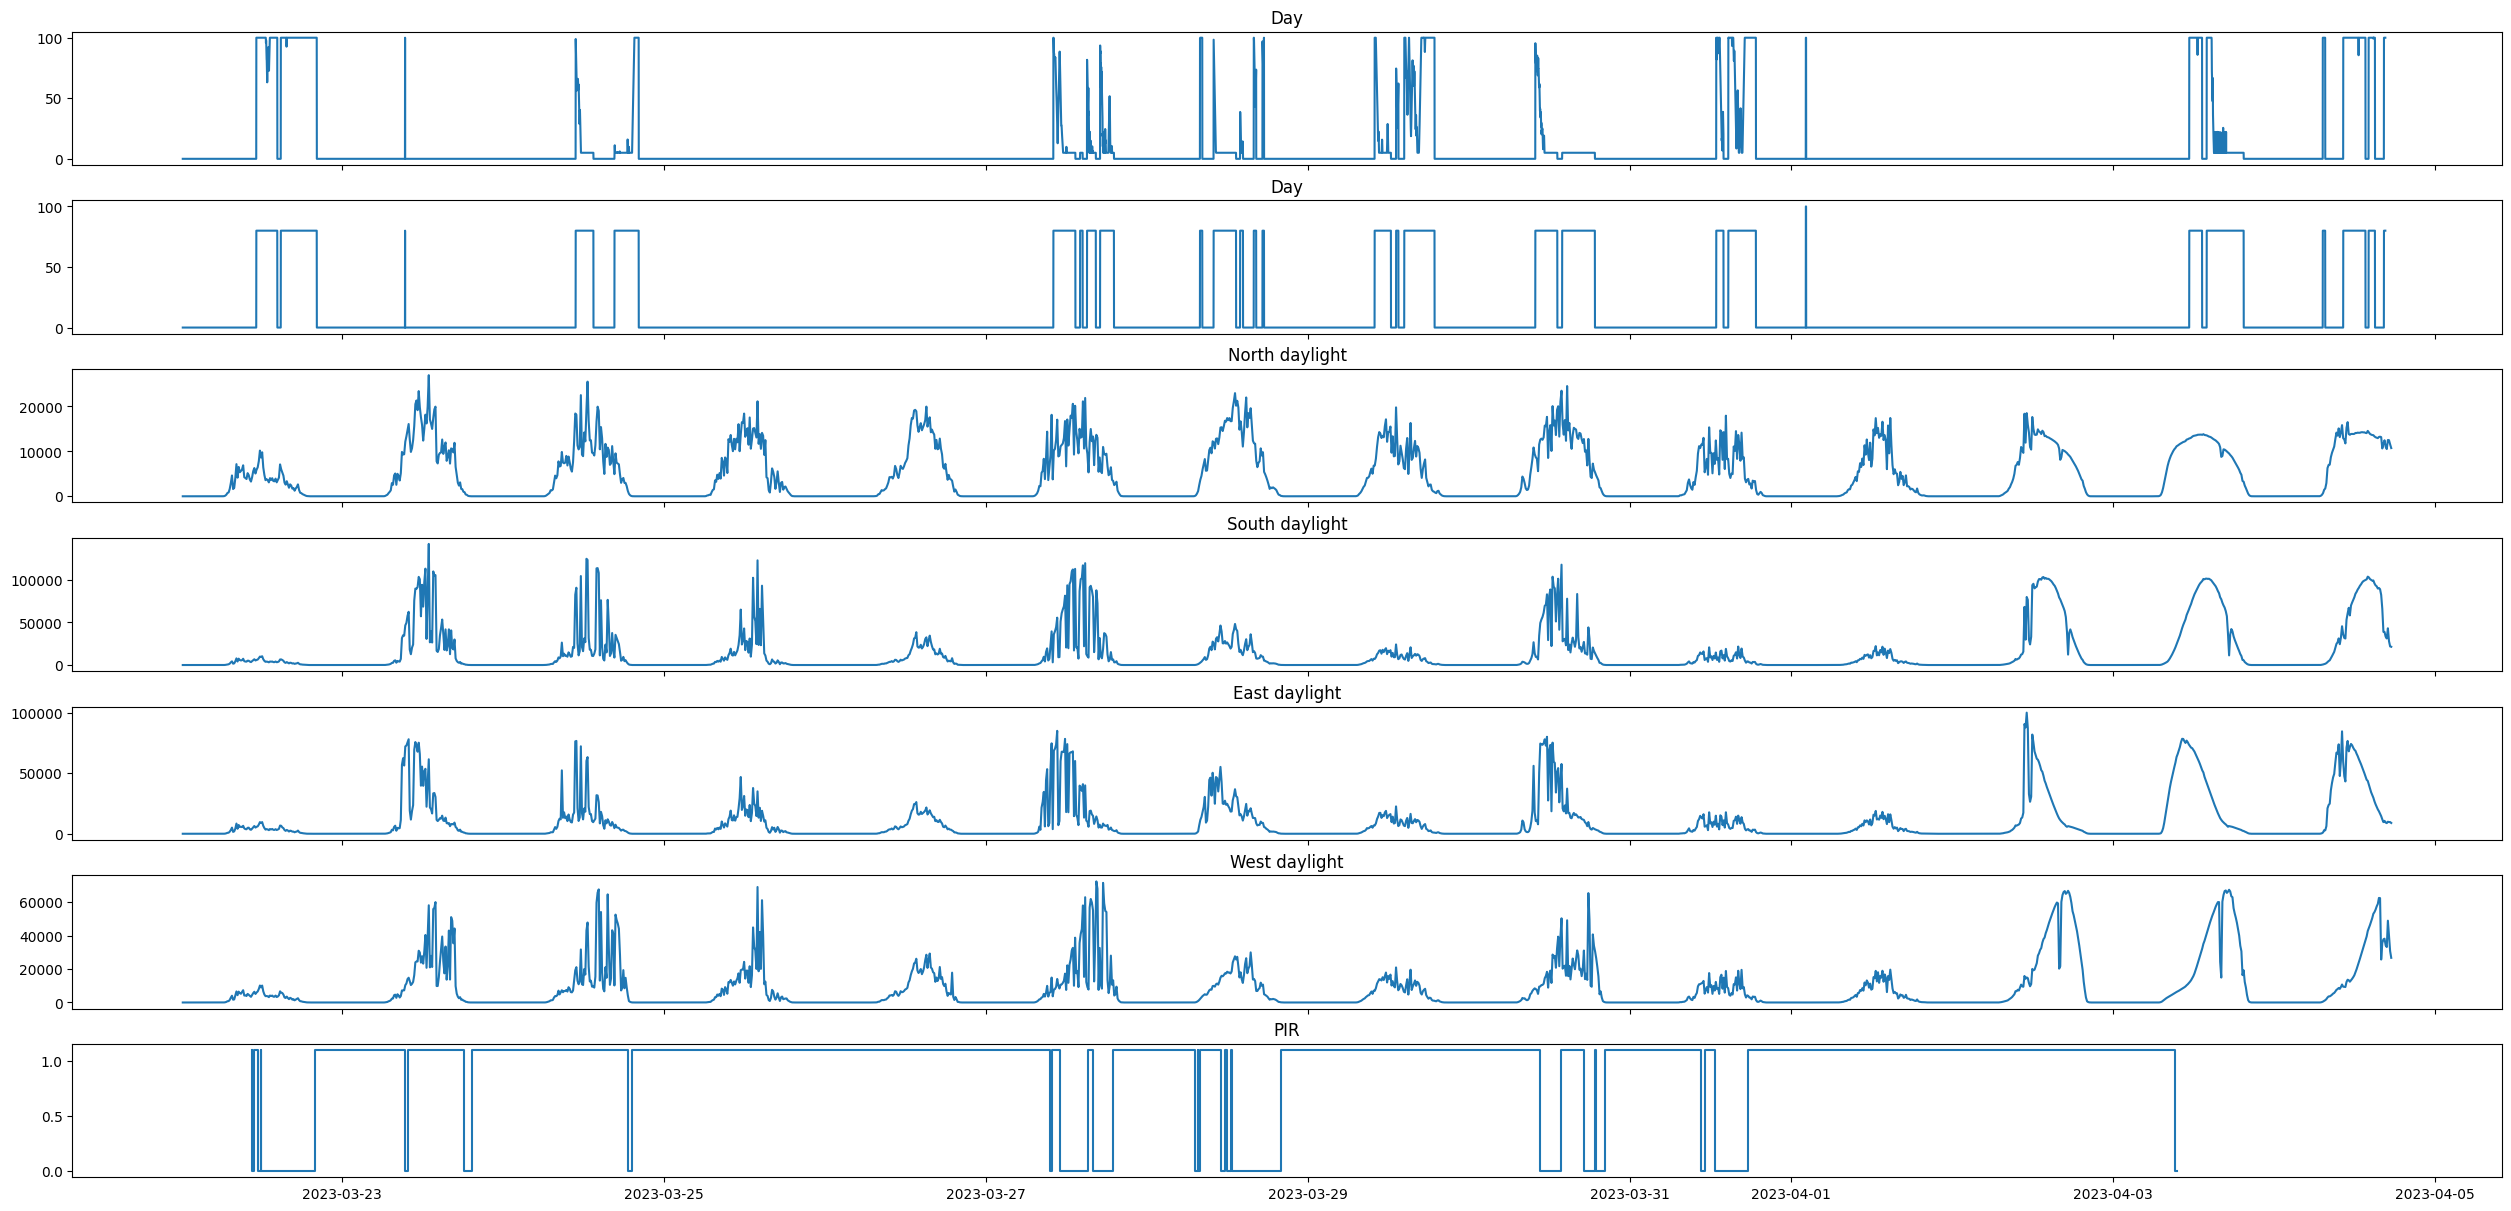

In [56]:
fig, axs = plt.subplots(7, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(allignedDay)
axs[0].set_title('Day')
axs[1].plot(allignedRoom)
axs[1].set_title('Day')
axs[2].plot(nortH)
axs[2].set_title('North daylight')
axs[3].plot(soutH)
axs[3].set_title('South daylight')
axs[4].plot(easT)
axs[4].set_title('East daylight')
axs[5].plot(wesT)
axs[5].set_title('West daylight')
axs[6].step(pir.index, pir)
axs[6].set_title('PIR')

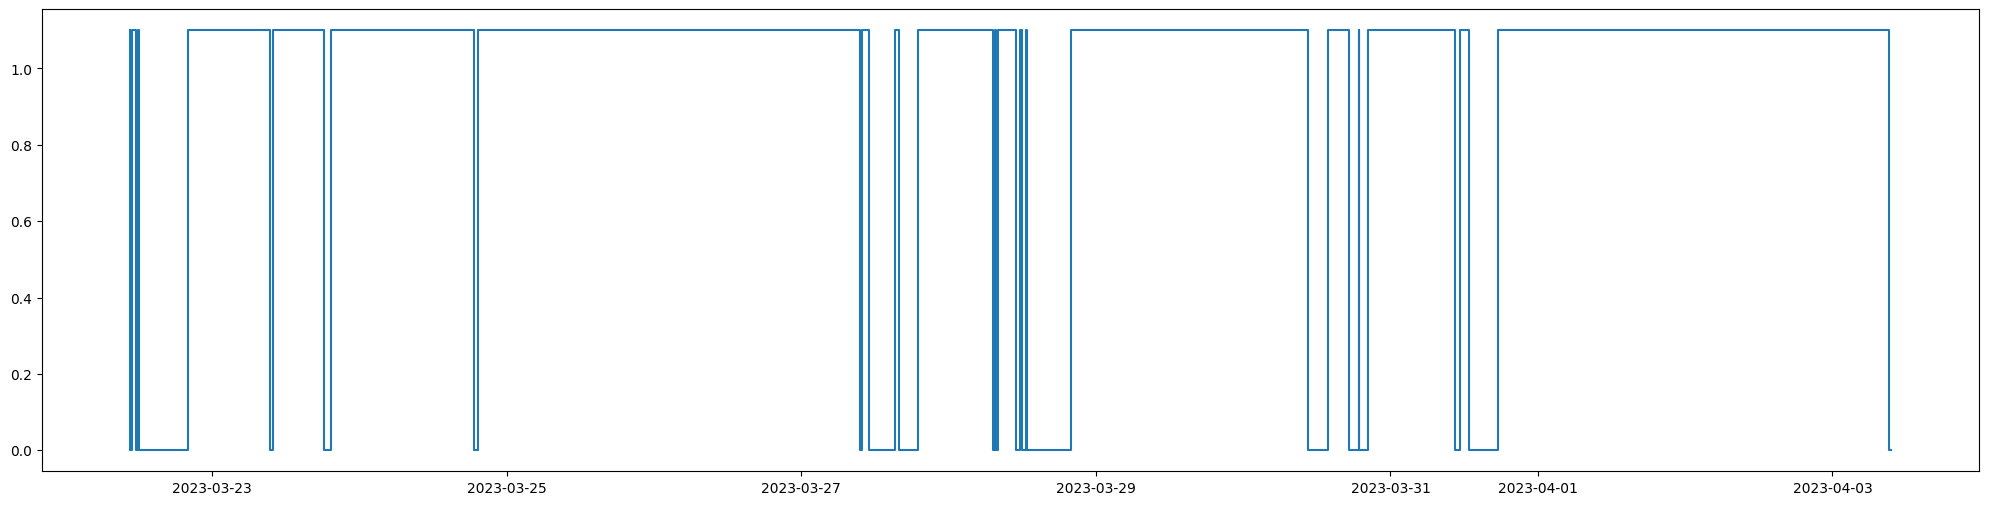

In [46]:
plt.figure(figsize=(25,6))
plt.step(pir.index, pir)